## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [5]:
features= data.drop(['target'], axis=1).corr()
features

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


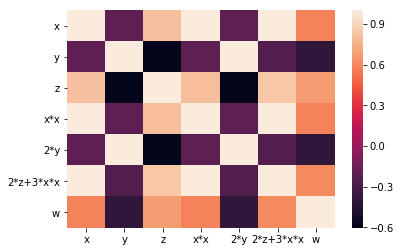

In [6]:
sns.heatmap(features)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)
grid = {"alpha":np.logspace(-3,3,7)}
clf = SGDClassifier(loss='log')
clf_cv = GridSearchCV(clf,grid,cv=5)
clf_cv.fit(x_train,y_train)
print(clf_cv.best_params_)
print(clf_cv.best_score_)

{'alpha': 0.001}
1.0


In [8]:
best_alpha=0.001
best_model = SGDClassifier(loss='log',alpha=best_alpha)
best_model.fit(x_train,y_train)


SGDClassifier(alpha=0.001, loss='log')

In [9]:
W=best_model.coef_
W

array([[ 1.05877439, -1.68493621,  2.515984  ,  1.01937595, -1.68493621,
         1.221208  ,  0.8066683 ]])

In [10]:
y_pred = best_model.predict(x_test)
from sklearn.metrics import accuracy_score
best_model_accuracy = accuracy_score(y_test,y_pred)
print('Model Accuracy: '+str(best_model_accuracy))

Model Accuracy: 1.0


In [11]:
noise = np.random.normal(0,0.01,X.shape)

In [12]:
X_dash = X + noise
x_dtrain, x_dtest, y_dtrain, y_dtest=train_test_split(X_dash,Y,test_size=0.3)

In [13]:
best_model.fit(x_dtrain,y_dtrain)

SGDClassifier(alpha=0.001, loss='log')

In [14]:
W_dash = best_model.coef_
W_dash

array([[ 2.23256254, -2.47925609,  5.5499799 ,  1.91796573, -2.51406636,
         2.47056315,  0.70143146]])

In [15]:
y_dpred = best_model.predict(x_dtest)
best_model_edited_accuracy = accuracy_score(y_dtest,y_dpred)
print('Edited Model Accuracy :'+ str(best_model_edited_accuracy))

Edited Model Accuracy :1.0


In [21]:
print('Difference in accuarcy :'+str(abs(best_model_accuracy-best_model_edited_accuracy)))

Difference in accuarcy :0.0


In [22]:
absW = abs(W-W_dash)
percentage_change_weights=absW/abs(W)*100
top4_indices= (-percentage_change_weights).argsort()[:4][0][:4]
top4_indices

array([2, 0, 5, 3], dtype=int64)

In [23]:
feature_names= data.columns
print('the top 4 features which have higher % change in weights compared to the other features :')
print(feature_names[top4_indices])

the top 4 features which have higher % change in weights compared to the other features :
Index(['z', 'x', '2*z+3*x*x', 'x*x'], dtype='object')


 <b>Observations</b>
 <p> The weights W[2,0,5,3] differ significantly before and after adding pertubation indicating a larger % change in weights.
    Due to fluctuating weights, the magnitude of the weights cannot be interpreted directly for feature importance. </p>
 <p> If one feature is represented as a linear combination of another features, then those features are mulicolinear. In our case the features ['z', 'x', '2*z+3*x*x', 'x*x'] are multicollinear. </p>
 <p> The difference in accuracy is 0.0, Due to fluctuating weights, model loses feature interpretability.</p>

# Task 2: Linear SVM



In [24]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.3)
grid = {"alpha":np.logspace(-3,3,7)}
clf = SGDClassifier(loss='hinge')
clf_cv = GridSearchCV(clf,grid,cv=5)
clf_cv.fit(x_train,y_train)
print(clf_cv.best_params_)
print(clf_cv.best_score_)

{'alpha': 0.001}
1.0


In [25]:
best_alpha=0.001
best_model = SGDClassifier(loss='hinge',alpha=best_alpha)
best_model.fit(x_train,y_train)


SGDClassifier(alpha=0.001)

In [26]:
W=best_model.coef_
W

array([[ 2.14347463, -2.63367398,  6.48409125,  1.77250613, -2.63367398,
         2.37811033,  2.17362824]])

In [27]:
y_pred = best_model.predict(x_test)
from sklearn.metrics import accuracy_score
best_model_accuracy = accuracy_score(y_test,y_pred)
print('Model Accuracy: '+str(best_model_accuracy))

Model Accuracy: 1.0


In [28]:
noise = np.random.normal(0,0.01,X.shape)

In [29]:
X_dash = X + noise
x_dtrain, x_dtest, y_dtrain, y_dtest=train_test_split(X_dash,Y,test_size=0.3)

In [30]:
best_model.fit(x_dtrain,y_dtrain)

SGDClassifier(alpha=0.001)

In [31]:
W_dash = best_model.coef_
W_dash

array([[ 0.47209927, -0.92987517,  2.38988104,  0.43047624, -0.95394903,
         0.66185221,  0.22006151]])

In [32]:
y_dpred = best_model.predict(x_dtest)
best_model_edited_accuracy = accuracy_score(y_dtest,y_dpred)
print('Edited Model Accuracy :'+ str(best_model_edited_accuracy))

Edited Model Accuracy :1.0


In [33]:
print('Difference in accuarcy :'+str(abs(best_model_accuracy-best_model_edited_accuracy)))

Difference in accuarcy :0.0


In [34]:
absW = abs(W-W_dash)
percentage_change_weights=absW/abs(W)*100
top4_indices= (-percentage_change_weights).argsort()[:4][0][:4]
top4_indices

array([6, 0, 3, 5], dtype=int64)

In [35]:
feature_names= data.columns
print('the top 4 features which have higher % change in weights compared to the other features :')
print(feature_names[top4_indices])

the top 4 features which have higher % change in weights compared to the other features :
Index(['w', 'x', 'x*x', '2*z+3*x*x'], dtype='object')


 <b>Observations</b>
 <p> The weights W[6,0,3,5] differ significantly before and after adding pertubation indicating a larger % change in weights.
    Due to fluctuating weights, the magnitude of the weights cannot be interpreted directly for feature importance. </p>
 <p> If one feature is represented as a linear combination of another features, then those features are mulicolinear. In our case the features ['w', 'x', '2*z+3*x*x', 'x*x'] are multicollinear. </p>
 <p> The difference in accuracy is 0.0, Due to fluctuating weights, model loses feature interpretability.</p>